# Hopfield Network Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hopfield import *

In [2]:
# Load trainig data (memories)
x_train = np.load('mnist_train.npz')['states']
num_train, num_features = x_train.shape

print(f"Number of training samples: {num_train}")
print(f"Number of features: {num_features}")
print(f"Unique values in train states: {np.unique(x_train)}")
print('---')

# Load test data
x_test = np.load('mnist_test.npz')['states']
num_test = x_test.shape[0]
print(f"Number of test samples: {num_test}")
print(f"Unique values in test states: {np.unique(x_test)}")

Number of training samples: 10
Number of features: 784
Unique values in train states: [-1  1]
---
Number of test samples: 100
Unique values in test states: [-1  1]


In [3]:
# Initialize Hopfield Network
hopfield_net = HopfieldNetwork(n_neurons=num_features)

# Train Hopfield Network
hopfield_net.train(x_train)


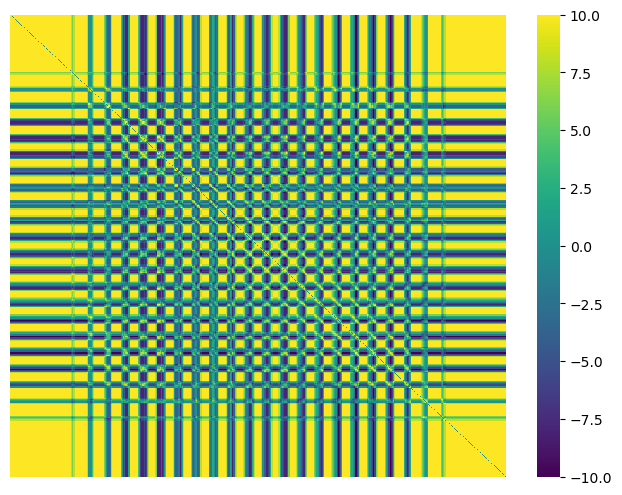

In [4]:
# Weights of the trained Hopfield Network
W = hopfield_net.get_weights()

# Plot the weight matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(W, cmap='viridis')

ax.set_xticks([])
ax.set_yticks([])
plt.show()

<Axes: >

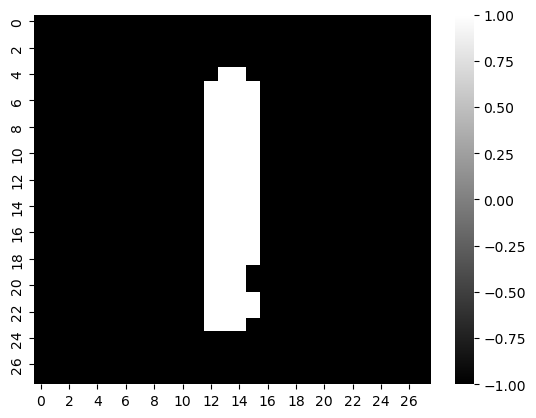

In [12]:
sns.heatmap(x_test[0].reshape(28,28), cmap='gray')

In [19]:
out = hopfield_net.retrieve(x_test[15])

<Axes: >

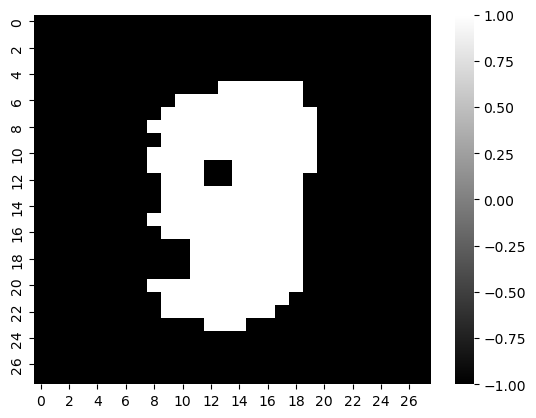

In [20]:
sns.heatmap(out.reshape(28,28), cmap='gray')